In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()
data.columns = ['TV','Sales']

In [ ]:
data

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
...,...,...
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8
199,283.6,25.5


In [ ]:
# print the shape of the DataFrame
data.shape

(200, 2)

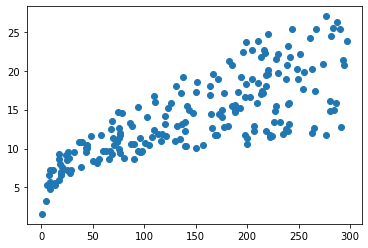

In [ ]:
# visualize the relationship between the features and the response using scatterplots
#data.plot(kind='scatter', x='TV', y='Sales')
plt.scatter(data['TV'], data['Sales'])

In [ ]:
# create X and y
#taking only one variable for now
X = data[['TV']]
X

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [ ]:
y = data.Sales
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [ ]:
# manually calculate the prediction using above slope and intercept in b0+b1*x
7.032594 + 0.047537*50

9.409444

In [ ]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [230.1]})
X_new.head()

,TV
0,230.1


In [ ]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([17.97077451])

In [ ]:
data['TV'].min()

0.7

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data['TV'].min(), data['TV'].max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [ ]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

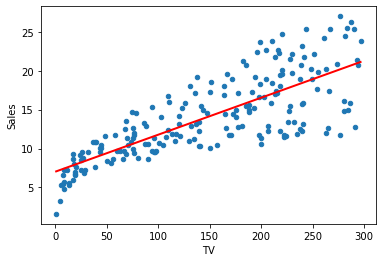

In [ ]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
predictions = lm.predict(X)
print(sqrt(mean_squared_error(y, predictions)))

3.2423221486546887


In [ ]:
r2 = r2_score(y, predictions)
r2

0.611875050850071